In [1]:
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from croissant.healpix import grid2healpix
import faraday as fd

#%matplotlib notebook

## Spectral Response

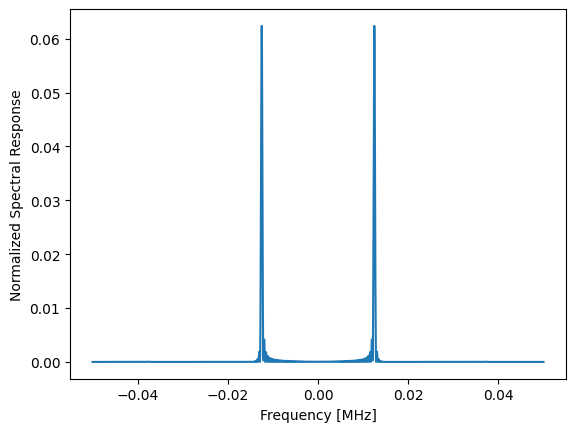

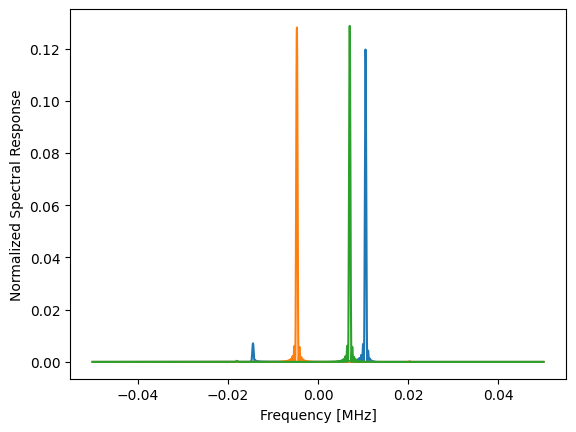

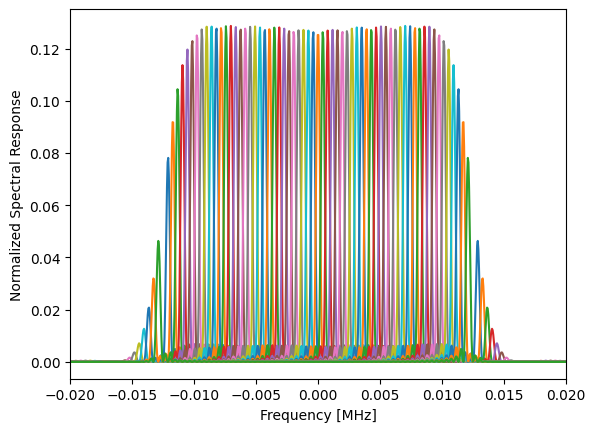

In [2]:
sim = fd.Simulator(None, None)

plt.figure()
plt.plot(sim.offset, sim.spec[:, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.show()

plt.figure()
plt.plot(sim.offset, sim.spec[:, -5])
plt.plot(sim.offset, sim.spec[:, 20])
plt.plot(sim.offset, sim.spec[:, 50])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.show()

plt.figure()
plt.plot(sim.offset, sim.spec[:, 1:])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.xlim(-20/1e3, 20/1e3)
plt.show()

In [36]:
(sim.offset[1]-sim.offset[0]) * 1e6

50.02501250625513

In [31]:
sim.wide_bin.shape

(2000,)

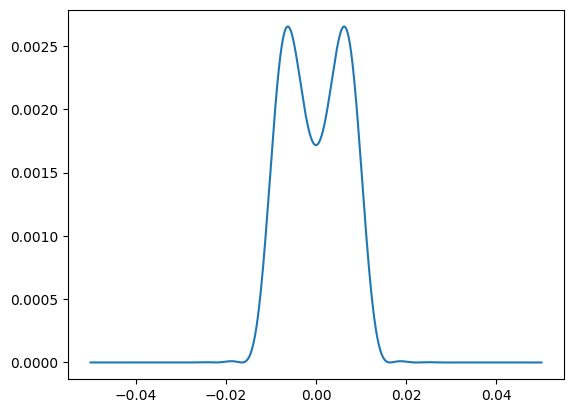

In [38]:
plt.figure()
plt.plot(sim.offset, sim.wide_bin)
plt.show()

## Zenith Source

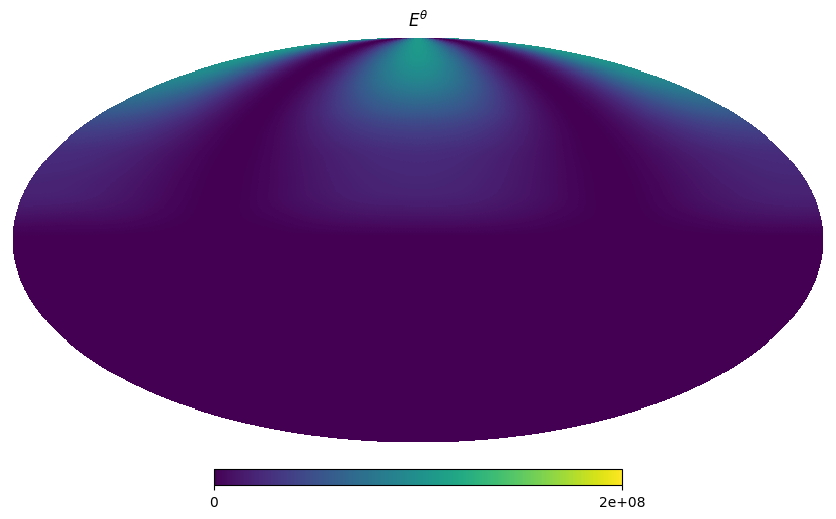

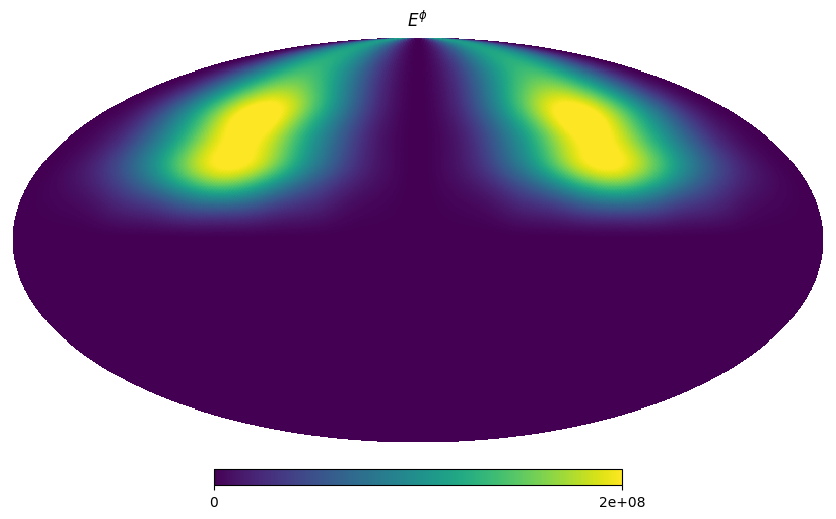

In [3]:
beam = fd.LuseeBeam("../data/hfss_lbl_3m_75deg.2port.fits")

hp.mollview(np.abs(beam.beam_X[0])**2, title="$E^{\\theta}$", min=0, max=2e8)
plt.show()
hp.mollview(np.abs(beam.beam_X[1])**2, title="$E^{\\phi}$", min=0, max=2e8)
plt.show()

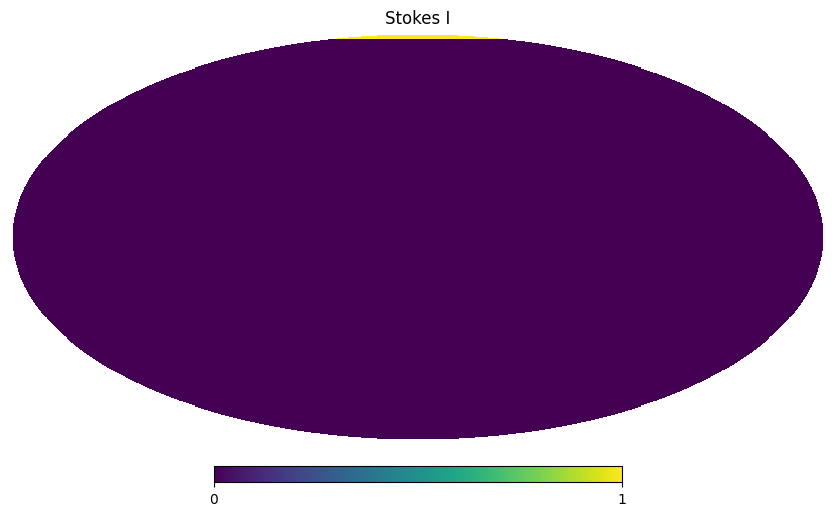

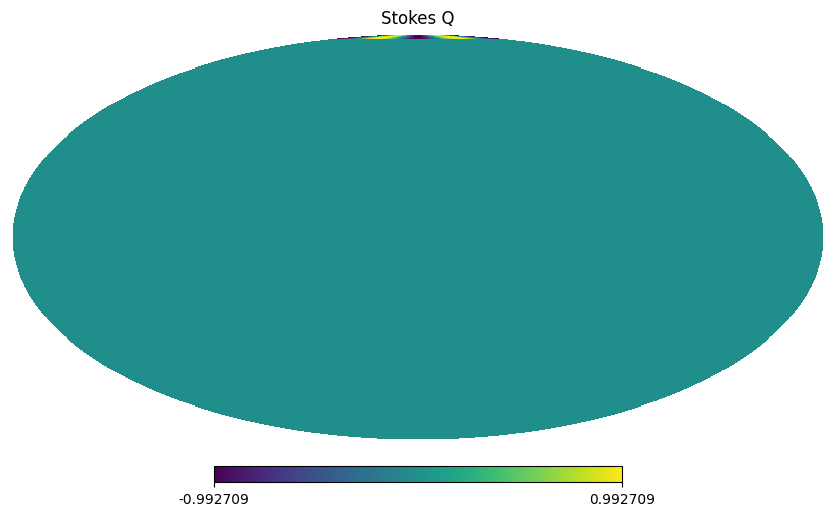

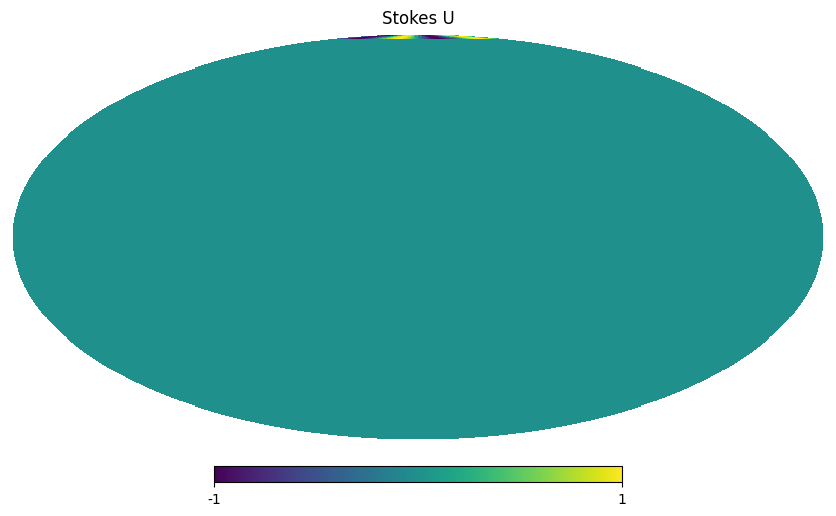

In [4]:
sky = fd.Sky.zeros()
sky.add_point_source()  # 5 deg source at zenith
hp.mollview(sky.stokes[0, 0], title="Stokes I")
plt.show()
hp.mollview(sky.stokes[0, 1], title="Stokes Q")
plt.show()
hp.mollview(sky.stokes[0, 2], title="Stokes U")
plt.show()

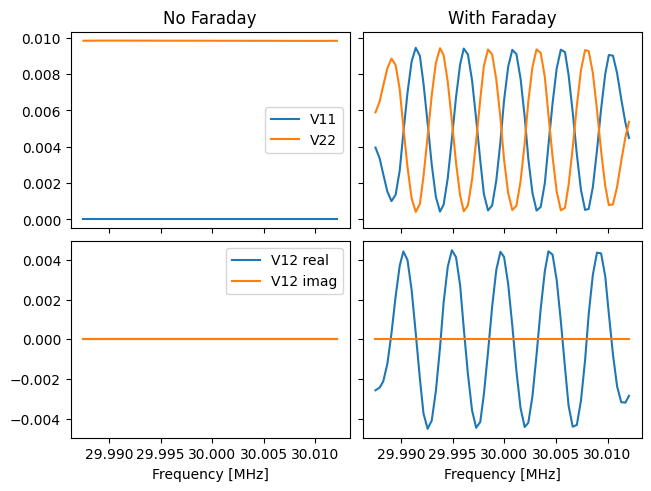

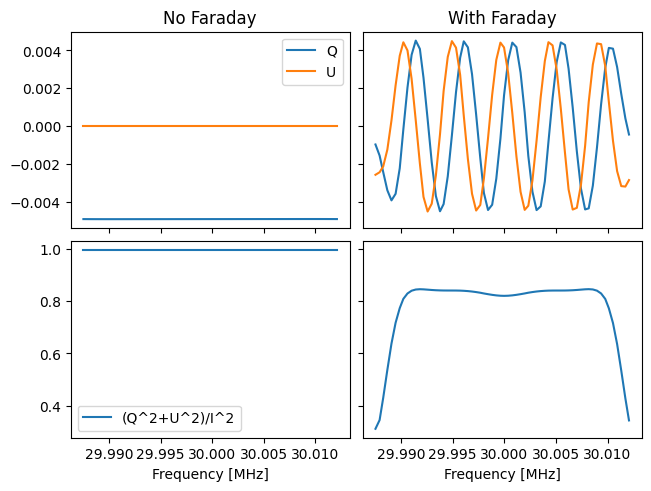

In [5]:
sim = fd.Simulator(beam, sky)
sim.run()
fd.sim.plot_vis(sim.freq, sim.vis, sim.vis_rot)
fd.sim.plot_stokes(sim.freq, sim.stokes, sim.stokes_rot)

## Off-center source

Instead of moving the source, we rotate the beam.

In [23]:
lat = 60
lon = 20

theta_src = np.deg2rad(90-lat)  # polar angle
phi_src = np.deg2rad(lon)
ct = np.cos(theta_src)
st = np.sin(theta_src)
cp = np.cos(phi_src)
sp = np.sin(phi_src)

x = st * cp
y = st * sp
z = ct

beta = np.arcsin(x)
gamma = np.arctan2(y/np.cos(beta), z/np.cos(beta))

rot = hp.Rotator(rot=(0, beta, gamma), deg=False)

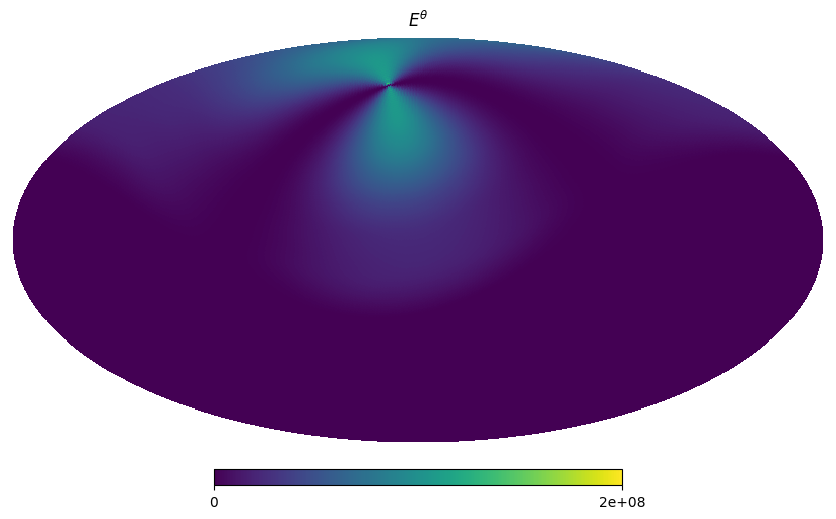

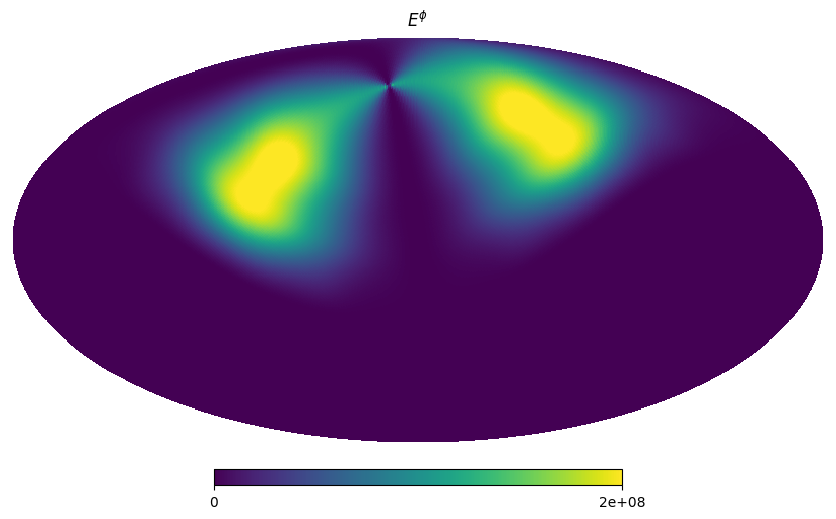

In [27]:
beam = fd.LuseeBeam("../data/hfss_lbl_3m_75deg.2port.fits")
beam.rotate(rot)
hp.mollview(np.abs(beam.beam_X[0])**2, title="$E^{\\theta}$", min=0, max=2e8)
plt.show()
hp.mollview(np.abs(beam.beam_X[1])**2, title="$E^{\\phi}$", min=0, max=2e8)
plt.show()

In [28]:
sky = fd.Sky.zeros()
sky.add_point_source()  # 5 deg source at zenith

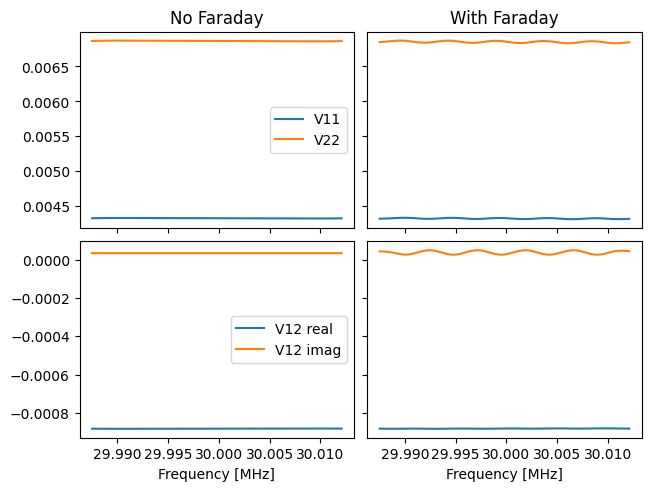

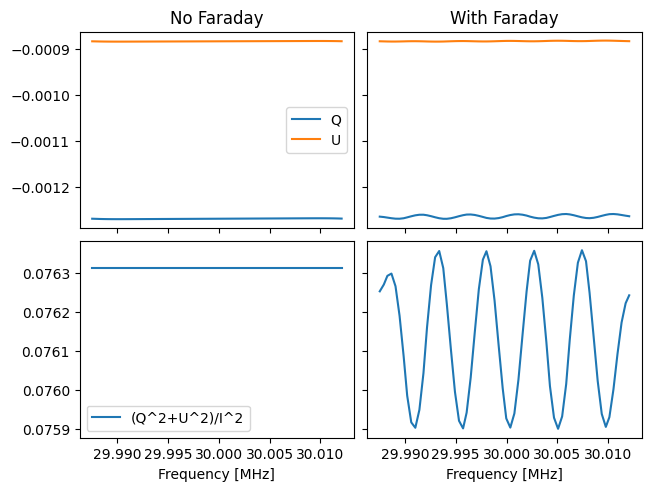

In [29]:
sim = fd.Simulator(beam, sky)
sim.run()
fd.sim.plot_vis(sim.freq, sim.vis, sim.vis_rot)
fd.sim.plot_stokes(sim.freq, sim.stokes, sim.stokes_rot)

## Fat spectral bins